Muhammad Hassaan Azam

AI/ML Intern

DHC 831

# Task 4: Credit Risk Analysis

## Important Libraries and Loading Dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/cs-training.csv')
# test_df = pd.read_csv('/content/cs-test.csv')
print(df.shape)
# print(test_df.shape)

display(df.head())


(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0




| **Variable Name** | **Description** | **Data Type** |
|------------------|----------------|--------------|
| **SeriousDlqin2yrs** | Indicates whether the person has experienced 90+ days past due delinquency. | Y/N (Boolean) |
| **RevolvingUtilizationOfUnsecuredLines** | Ratio of total balance on credit cards and personal lines of credit (excluding real estate and installment debt) to the total credit limit. | Percentage |
| **Age** | Borrower’s age in years. | Integer |
| **NumberOfTime30-59DaysPastDueNotWorse** | Number of times the borrower has been 30-59 days past due in the last 2 years, without being worse. | Integer |
| **DebtRatio** | Ratio of monthly debt payments, alimony, and living costs to monthly gross income. | Percentage |
| **MonthlyIncome** | Borrower’s monthly income. | Real (Float) |
| **NumberOfOpenCreditLinesAndLoans** | Number of open loans (e.g., car loans, mortgages) and credit lines (e.g., credit cards). | Integer |
| **NumberOfTimes90DaysLate** | Number of times the borrower has been 90 or more days past due. | Integer |
| **NumberRealEstateLoansOrLines** | Number of mortgage and real estate loans, including home equity lines of credit. | Integer |
| **NumberOfTime60-89DaysPastDueNotWorse** | Number of times the borrower has been 60-89 days past due in the last 2 years, without being worse. | Integer |
| **NumberOfDependents** | Number of dependents in the borrower's family (excluding themselves). | Integer |

---

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

Checking Null Values

In [4]:
df.isna().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [5]:
# Droping null records
df.dropna(inplace=True)

In [6]:
df.isna().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [7]:
# Droping unamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [9]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

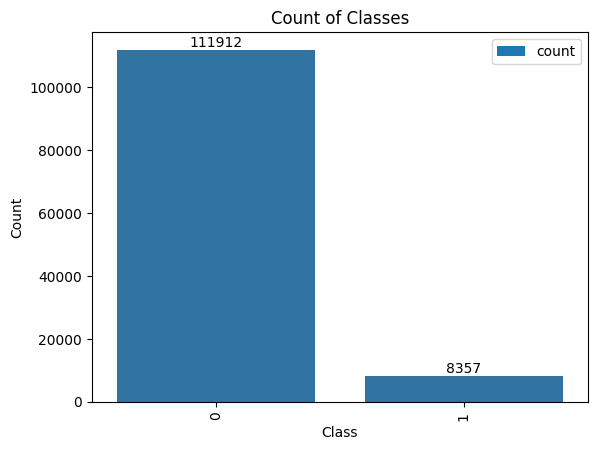

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

y.value_counts().plot(kind='bar')
title = 'Count of Classes'
unique_values, value_counts = np.unique(y, return_counts=True)
ax = sns.countplot(x=y)
ax.bar_label(ax.containers[0])
plt.title(title)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(unique_values)
plt.show()
print()

## Data Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [12]:
y_train.value_counts()

,count
SeriousDlqin2yrs,
0,89529
1,6686


In [13]:
y_test.value_counts()

,count
SeriousDlqin2yrs,
0,22383
1,1671


## SMOTE Implementation

In [ ]:
# Now we going to equal both classes by generating synthetic data using smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_syndata, y_train_syndata = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_syndata.value_counts()

,count
SeriousDlqin2yrs,
0,89529
1,89529


## Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_syndata)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_syndata)
y_pred = log_reg.predict(X_test_scaled)

print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Precision Score", precision_score(y_test, y_pred, average="weighted"))
print("Recall Score", recall_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score 0.6566059699010559
Precision Score 0.9053546816387208
Recall Score 0.6672651107121484
F1 Score 0.21258341277407056
              precision    recall  f1-score   support

           0       0.96      0.66      0.78     22383
           1       0.13      0.67      0.21      1671

    accuracy                           0.66     24054
   macro avg       0.54      0.66      0.50     24054
weighted avg       0.91      0.66      0.74     24054



In [ ]:
class_names = ['No', 'Yes']

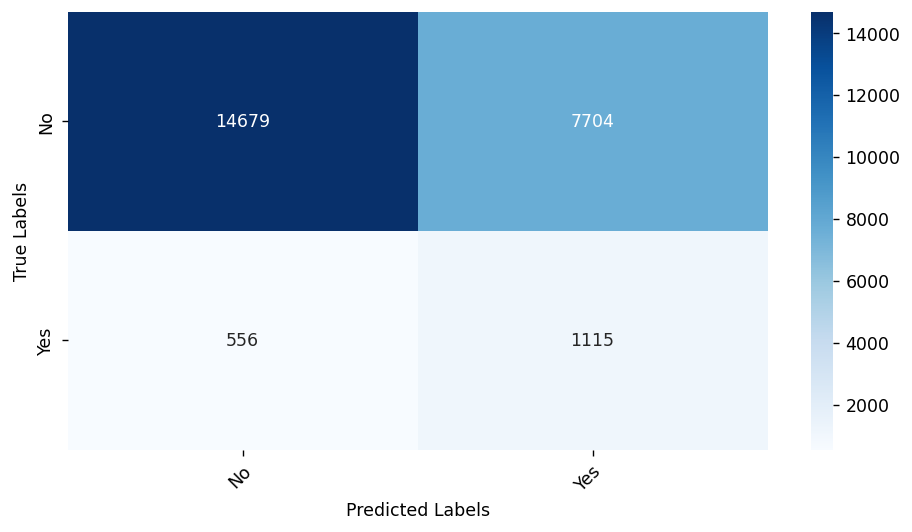

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
# font = {
#     'size'   : 7}
# plt.rc('font', **font)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,5), dpi=125)
# Create colored confusion matrix with unique labels

labels = list(class_names)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
 # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Adjust the margins around the figure
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# fig.savefig('Confusion Matrix.png')
plt.show()

## Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train_syndata)
y_pred = nb.predict(X_test_scaled)

print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Precision Score", precision_score(y_test, y_pred, average="weighted"))
print("Recall Score", recall_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score 0.9322773759042156
Precision Score 0.9123916625236238
Recall Score 0.1490125673249551
F1 Score 0.23413258110014104
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22383
           1       0.55      0.15      0.23      1671

    accuracy                           0.93     24054
   macro avg       0.74      0.57      0.60     24054
weighted avg       0.91      0.93      0.91     24054



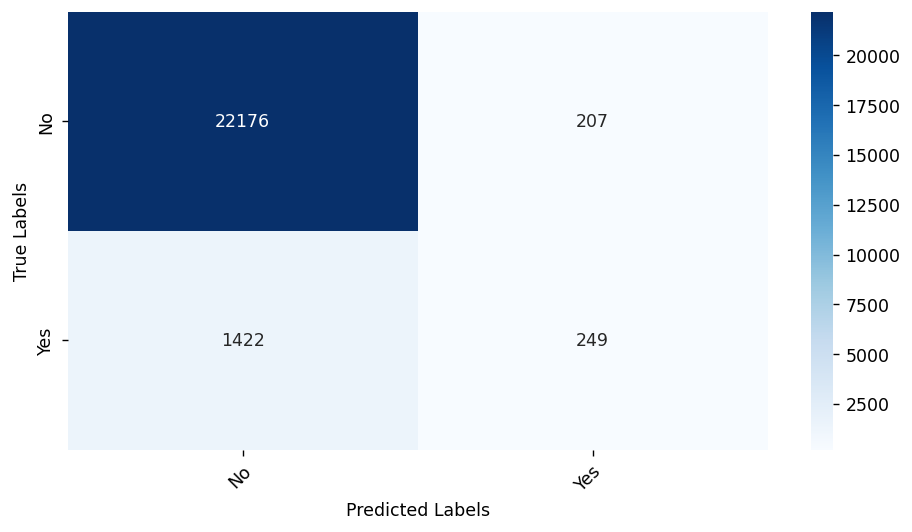

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
# font = {
#     'size'   : 7}
# plt.rc('font', **font)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,5), dpi=125)
# Create colored confusion matrix with unique labels

labels = list(class_names)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
 # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Adjust the margins around the figure
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# fig.savefig('Confusion Matrix.png')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train_syndata)
y_pred = rfc.predict(X_test_scaled)

print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Precision Score", precision_score(y_test, y_pred, average="weighted"))
print("Recall Score", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score", f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred))

Accuracy Score 0.8902053712480252
Precision Score 0.9078940601184057
Recall Score 0.8902053712480252
F1 Score 0.8982427254933666
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     22383
           1       0.29      0.40      0.34      1671

    accuracy                           0.89     24054
   macro avg       0.62      0.66      0.64     24054
weighted avg       0.91      0.89      0.90     24054



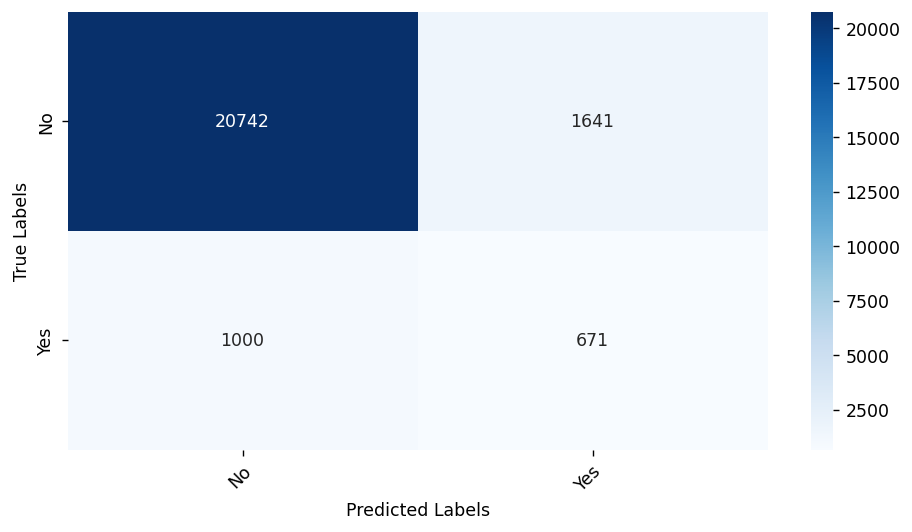

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
# font = {
#     'size'   : 7}
# plt.rc('font', **font)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,5), dpi=125)
# Create colored confusion matrix with unique labels

labels = list(class_names)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
 # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Adjust the margins around the figure
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# fig.savefig('Confusion Matrix.png')
plt.show()

## XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_scaled, y_train_syndata)
y_pred = xgb_clf.predict(X_test_scaled)

print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Precision Score", precision_score(y_test, y_pred, average="weighted"))
print("Recall Score", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score", f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred))


Accuracy Score 0.8773592749646628
Precision Score 0.9087392780568887
Recall Score 0.8773592749646628
F1 Score 0.8909817791081598
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     22383
           1       0.27      0.45      0.34      1671

    accuracy                           0.88     24054
   macro avg       0.61      0.68      0.63     24054
weighted avg       0.91      0.88      0.89     24054



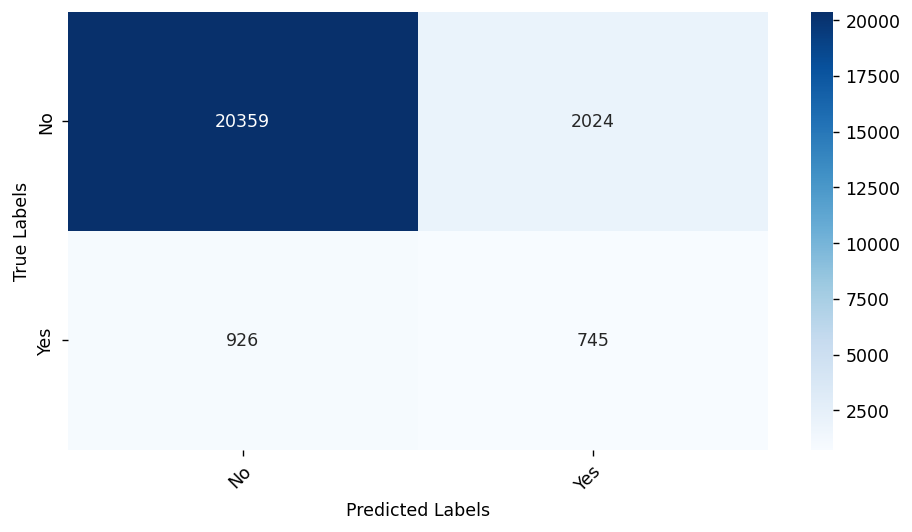

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
# font = {
#     'size'   : 7}
# plt.rc('font', **font)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,5), dpi=125)
# Create colored confusion matrix with unique labels

labels = list(class_names)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
 # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Adjust the margins around the figure
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# fig.savefig('Confusion Matrix.png')
plt.show()

## PYCARET

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.

In [ ]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.4 MB/s eta 0:00:00
   ━━━━

In [ ]:
!pip install scikit-learn==1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires scikit-learn>1.4.0, but you have scikit-learn 1.4.0 which is incompatible.


Uploading pipline for Classification

In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

Adding data for training (also you can set different parameters for data preprocessing)

In [ ]:
exp.setup(X_train_scaled, target = y_train_syndata, session_id = 7)

,Description,Value
0,Session id,7
1,Target,SeriousDlqin2yrs
2,Target type,Binary
3,Original data shape,"(179058, 11)"
4,Transformed data shape,"(179058, 11)"
5,Transformed train set shape,"(125340, 11)"
6,Transformed test set shape,"(53718, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


PyCaret automatically runs different machine learning models up to 10 folds and also performs hyperparameter optimization.

In [ ]:
# compare baseline models
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9146,0.9744,0.9081,0.9202,0.9141,0.8293,0.8294,20.7270
et,Extra Trees Classifier,0.9062,0.9694,0.9147,0.8994,0.9070,0.8124,0.8125,17.0130
dt,Decision Tree Classifier,0.8806,0.8806,0.8994,0.8668,0.8828,0.7612,0.7618,0.8100
xgboost,Extreme Gradient Boosting,0.8799,0.9552,0.8514,0.9029,0.8764,0.7598,0.7611,1.1430
lightgbm,Light Gradient Boosting Machine,0.8745,0.9509,0.8422,0.9003,0.8703,0.7489,0.7505,4.5450
gbc,Gradient Boosting Classifier,0.8445,0.9162,0.7547,0.9198,0.8291,0.6889,0.7003,18.6930
ada,Ada Boost Classifier,0.8368,0.9017,0.7586,0.8993,0.8229,0.6736,0.6820,4.2000
knn,K Neighbors Classifier,0.7810,0.8532,0.7264,0.8155,0.7684,0.5621,0.5655,7.4000
qda,Quadratic Discriminant Analysis,0.6671,0.7540,0.7890,0.6372,0.7031,0.3342,0.3469,0.1430
lr,Logistic Regression,0.6548,0.7216,0.6563,0.6544,0.6553,0.3096,0.3097,1.4170


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Checking best highlighted models

In [ ]:
exp.create_model('rf') # Checking again and best model solo

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9138,0.9727,0.9114,0.9158,0.9136,0.8277,0.8277
1,0.9162,0.9759,0.9092,0.9222,0.9156,0.8325,0.8325
2,0.9126,0.9735,0.9051,0.9188,0.9119,0.8251,0.8252
3,0.9134,0.9744,0.9054,0.9201,0.9127,0.8267,0.8268
4,0.9179,0.9767,0.9100,0.9246,0.9172,0.8358,0.8359
5,0.9109,0.9734,0.9075,0.9137,0.9106,0.8218,0.8218
6,0.9130,0.9741,0.9073,0.9178,0.9125,0.8261,0.8261
7,0.9184,0.9752,0.9113,0.9244,0.9178,0.8368,0.8368
8,0.9205,0.9760,0.9108,0.9287,0.9197,0.8409,0.8411


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

### Model Evaluation & Result

In [ ]:
y_pred = best.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
print("---------Using Pycaret---------")
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Precision Score", precision_score(y_test, y_pred, average="weighted"))
print("Recall Score", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score", f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred))


---------Using Pycaret---------
Accuracy Score 0.8919514425875115
Precision Score 0.9113526134196825
Recall Score 0.8919514425875115
F1 Score 0.9006151630694169
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     22383
           1       0.31      0.44      0.36      1671

    accuracy                           0.89     24054
   macro avg       0.63      0.68      0.65     24054
weighted avg       0.91      0.89      0.90     24054



In [ ]:
class_names = ['No', 'Yes']

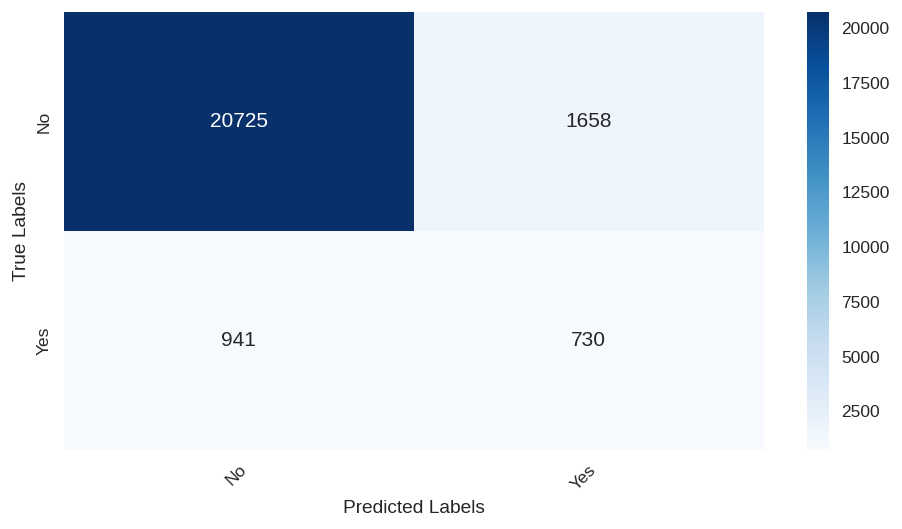

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
# font = {
#     'size'   : 7}
# plt.rc('font', **font)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,5), dpi=125)
# Create colored confusion matrix with unique labels

labels = list(class_names)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
 # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Adjust the margins around the figure
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# fig.savefig('Confusion Matrix.png')
plt.show()

## Conclusion

We applied four different machine learning models. To achieve more generalized results, we also used the PyCaret AutoML library, which automatically utilized 15 different models with a mean of 10 folds. Additionally, we performed hyperparameter optimization to obtain the best results from the dataset.